## Agrupamiento o Clustering

__Clustering__ es una técnica de __aprendizaje no supervisado__ que permite descubrir estructuras ocultas en datos no etiquetados. Esta técnica tiene como objetivo encontrar un agrupamiento natural de los datos donde los items pertenecientes a un mismo grupo son más similares entre si que aquellos pertenecientes a grupos diferentes.

### K-means
Es el algoritmo de clustering más popular, es uno de los más simples de implementar y a su vez eficiente comparado a otros algoritmos.
Este algoritmo pertenece a la categoría __clustering basado en prototipos__, es decir cada agrupamiento está representado por un prototipo como el __centroide__ o puntos similiares en el caso de características continuas, o el __medoid__(el punto más representativo que minimiza la distancia a todos los puntos del agrupamiento) en el caso de variables categóricas.

Una de las desventajas de este algoritmo, es que debemos especificar el número de clusters _k_ _a priori_

In [1]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

In [2]:
%cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/Clustering'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/Clustering'
/workspaces/IA/Clustering


/home/codespace/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_3479/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


A continuación vamos a crear un dataset de juguete con la función `make_blobs` para generar datos. `blob_centers` y `blob_std`: Define los centros y desviaciones estándar de los clusters en el espacio 2D.

In [4]:
# Creamos un dataset de juguete
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

`X, y = make_blobs(...)`: Genera 2000 puntos de datos distribuidos en blobs (aglomerados) con los centros y desviaciones estándar especificados.

In [5]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [6]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

In [7]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

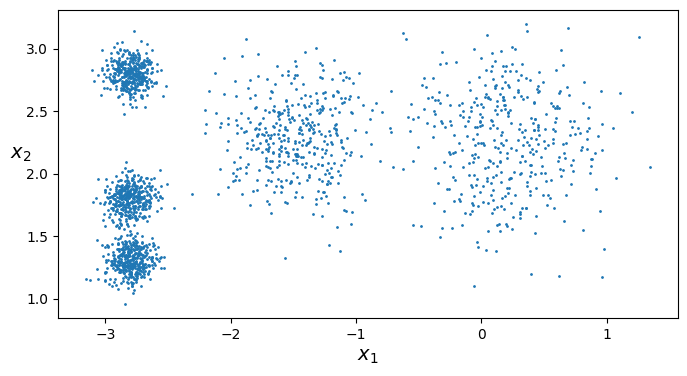

In [8]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### Entrenamiento y predicción

In [9]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=1)

Los centroides estimados:

In [10]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

Las etiquetas que predice KMeans corresponde a los índices del cluster al que un dato es asignado.

In [11]:
kmeans.labels_

array([1, 4, 0, ..., 3, 0, 4], dtype=int32)

Podemos predecir las etiquetas de nuevas instancias

In [12]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

Si graficamos las regiones de decisión podemos ver un diagrama conocido como _Voronoid tessellation_

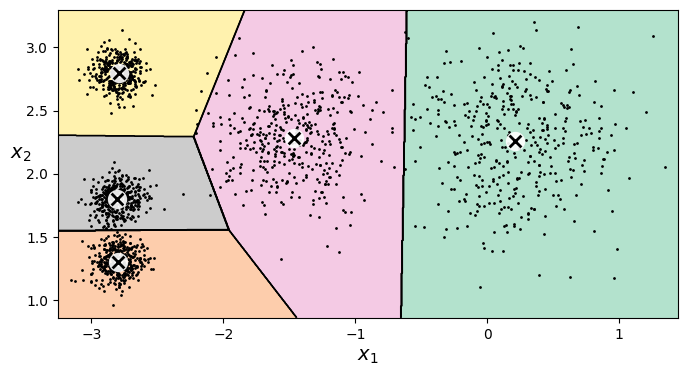

In [13]:
from modulos.graficacion import plot_decision_boundaries

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

En la clase KMeans, el método transform() transforma los puntos en la distancia desde cada instancia a todos los centroides:

In [14]:
kmeans.transform(X_new)

array([[0.32995317, 2.88633901, 1.49439034, 2.9042344 , 2.81093633],
       [2.80290755, 5.84236351, 4.4759332 , 5.84739223, 5.80730058],
       [3.29399768, 1.71086031, 1.69136631, 0.29040966, 1.21475352],
       [3.21806371, 1.21567622, 1.54808703, 0.36159148, 0.72581411]])

Si tuvieramos un dataset multidimensional (>>k) y lo transformamos de esta manera, nos quedaría un dataset k-dimensional. Esta transformación podría ser una **técnica de reducción dimensional no lineal** muy eficiente.

### Algoritmo k-means
El algoritmo de _k-means_ puede resumirse mediante los siguientes pasos:

1. Elegir de forma aleatoria _k_ centroides de las muestras como centros iniciales de los agrupamientos.
2. Asignar cada muestra al centroide más cercano $\mu^{(j)}$, _j_ $\in$ {_1_,...,_k_}.
3. Actualizar la ubicación de los centroides, calculando la media de todas las muestras asignadas a cada centroide. Se calcula, la diferencia entre el centroide anterior y el nuevo y se lo compara con la tolerancia definida.
4. Repetir los pasos 2 y 3 hasta que la tolerancia definida por el usuario o el número máximo de iteraciones sea alcanzado.

La similitud entre la muestras se mide con la __distancia cuadrática Euclídea__. Entonces, en base a la distancia euclídea se puede describir el algoritmo de k-means como un problema de optimización para minimizar la __suma de los errores cuadráticos (SSE)__:

$$SSE = \sum\limits_{i=1}^n\sum\limits_{j=1}^k w^{(i,j)}\lVert  x^{(i)} - \mu^{(j)}  \rVert_2^2$$

$\mu^{(j)}$ es el centroide en el agrupamiento _j_. $w^{(i,j)}$ es igual a 1, si la muestra $x^{(i)}$ pertenece al cluster _j_, de lo contrario, será igual a 0. Esta medida __SSE__ también se conoce como __Inercia__ cuando se obtiene la media de las distancias cuadráticas. La inercia puede entenderse como una medida de cuanta cohesión interna poseen los agrupamientos.


In [15]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,  max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,  max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,  max_iter=3, random_state=1)
kmeans_iter4 = KMeans(n_clusters=5, init="random", n_init=1,  max_iter=5, random_state=1)
kmeans_iter5 = KMeans(n_clusters=5, init="random", n_init=1, random_state=1) #max_iter=300
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
kmeans_iter4.fit(X)
_=kmeans_iter5.fit(X)

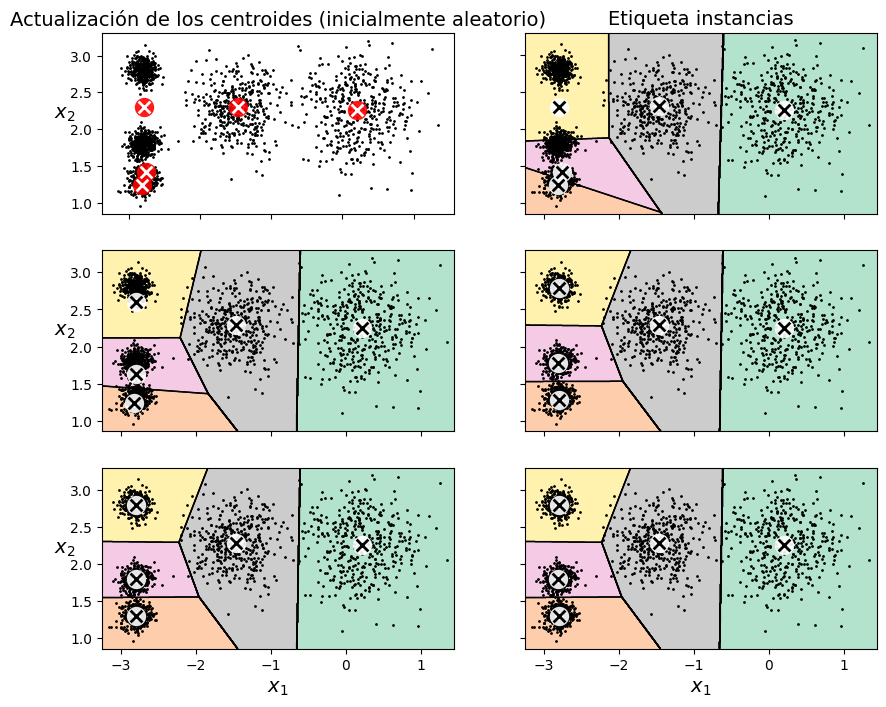

In [16]:
from modulos.graficacion import plot_data, plot_centroids,plot_decision_boundaries

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Actualización de los centroides (inicialmente aleatorio)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Etiqueta instancias", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter3, X, show_centroids=False, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter4, X, show_centroids=False)
plot_centroids(kmeans_iter4.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter5, X, show_ylabels=False)

plt.show()

Aunque el algoritmo de k-means garantiza su convergencia, podría no converger a la solución correcta. Esto dependerá de la inicialización del centroide como se ve a continuación usando distintas semillas:

In [17]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=0)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init1.fit(X)
kmeans_rnd_init2.fit(X)

KMeans(init='random', n_clusters=5, n_init=1, random_state=2)

Text(0.5, 1.0, 'Solución 2')

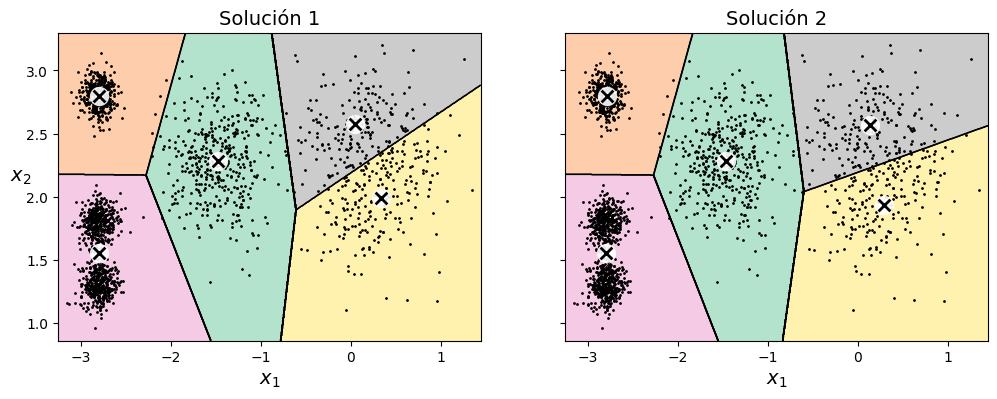

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_decision_boundaries(kmeans_rnd_init1, X)
plt.title("Solución 1", fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_rnd_init2, X, show_ylabels=False)
plt.title("Solución 2", fontsize=14)

Si supieramos de antemano la ubicación aproximada de los centroides, podríamos utilizar el hiperparámetro _init_ para inicializar los centroides mediante un array de numpy

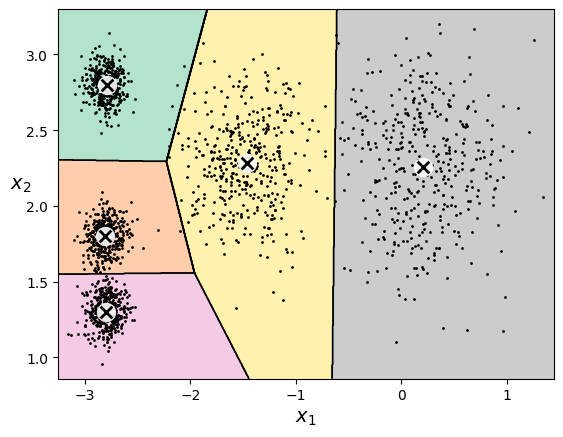

In [19]:
centroides_iniciales = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=centroides_iniciales, n_init=1, random_state=0)
kmeans.fit(X)
plot_decision_boundaries(kmeans, X, show_xlabels=True, show_ylabels=True)

### K-means++

El algoritmo clásico K-means, utiliza una semilla aleatoria para posicionar los centroides iniciales, esto puede dar como resultado un mal agrupamiento o una lenta convergencia si los centroides iniciales son mal seleccionados.

En la estrategia K-means++, los centroides son inicializados distantes entre sí dando una mayor probabilidad de obtener mejores resultados.

Para utilizar este algoritmo con el módulo de scikit-learn, se debe cambiar init='random' por **init='k-means++'** aunque esta opción, es la opción por defecto.

Notar que el hiperparámetro init, puede recibir un array con los centroides iniciales o un string con el tipo de algoritmo a utilizar

### Inercia
Una solución adicional a la convergencia, es ejecutar muchas veces el algoritmo con inicializaciones aleatorias y quedarse con la mejor solución. Este número de inicializaciones es controlado por el hiperparámetro `n_init` que por defecto es 10. Scikit-Learn implementa esta solución por defecto.

La metrica que utiliza para seleccionar la mejor solución es la __Inercia__ del modelo. La inercia es la distancia cuadrática media entre cada instancia y su centroide más cercano.
Se puede obtener la inercia del modelo haciendo:

In [20]:
kmeans.inertia_

211.59853725816828

La inercia tiene sus desventajas:
- supone que los agrupamientos son convexos e isotrópicos. No responde adecuadamente a agrupamientos elongados o con formas irregulares.
- La inercia no es una métrica normalizada: sólo sabemos que valores menores son mejores. Sin embargo, en espacios de grandes dimensionales, las distancias euclídeas tienden a aumentar (denominado como "curse of dimensionality").

In [21]:
kmeans.score(X)

-211.59853725816828

El método score() nos devuelve el valor negativo de la inercia. __¿Por qué?__

### Obtener el valor óptimo de _K_

Como el algoritmo k-means requiere que se determine el valor de _k_ a priori, se puede suponer que podríamos seleccionar un modelo con el menor valor de inercia. Sin embargo, esto no es tan simple

In [22]:
from sklearn.cluster import KMeans
kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=1)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=1)
kmeans_k3.fit(X)
kmeans_k8.fit(X)

KMeans(n_init=10, random_state=1)

In [23]:
kmeans_k3.inertia_

653.2167190021554

In [24]:
kmeans_k8.inertia_

118.36362398419881

Podemos hacer una gráfica de inercia en función de _k_

In [25]:
kmeans_per_k = [ KMeans(n_clusters=k, n_init=10, random_state=1).fit(X) for k in range(1, 10) ]
inertias = [ model.inertia_ for model in kmeans_per_k ]
#kmeans_per_k es una lista de objetos kmeans entrenados

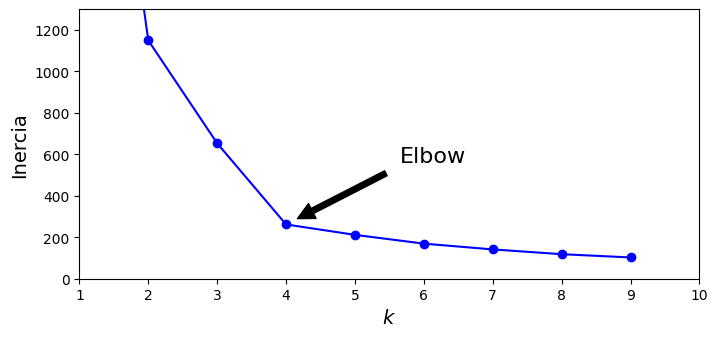

In [26]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
# 'figure fraction' : (0, 0) es izq y abajo (1, 1) es derecha arriba
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1) )
plt.axis([1, 10, 0, 1300])
plt.show()

Se puede ver que la inercia disminuye rápidamente conforme aumenta _k_ hasta 4. Después de este valor, la inercia disminuye lentamente. Teniendo en cuenta este gráfico, podríamos pensar que k=4 es una buena opción pero no podemos saber con exactitud que valor de _k_ es óptimo.

Un enfoque más preciso (pero con más costo computacional) es el **valor de silueta** (Silhouette score o Silhouette width), el valor de silueta es una medida de cuan similar es un punto a su propio cluster en comparación con otros clústeres.

este es el promedio de los **coeficientes de silueta** (silhouette coefficient) de cada una de las instancias.

El valor de silueta puede tomar valores entre -1 y +1. Un valor cercano a +1 significa que la instancia se encuentra en el interior de su propio agrupamiento y alejado de otros clusters, cercano a 0 significa que la instancia está en el borde del agrupamiento y un valor cercano a -1 significa que probablemente la instancia fue mal asignada al cluster.

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]] #por lo menos 2 clusters
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6023853013038848,
 0.6068660656395705,
 0.5615056066115491,
 0.5670239266989361]

El **valor de silueta** es una medida que relaciona las distancias dentro de un cluster con las distancias al cluster más cercano, por esto, en el código anterior, la función silhouette_score debe recibir un modelo con por lo menos 2 agrupamientos.

A continuación vamos a graficar el **valor de silueta** para el conjunto de datos para distintos valores de k

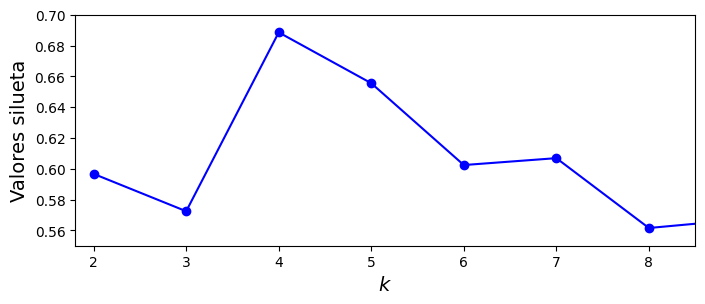

In [29]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Valores silueta", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

Ahora queda más claro que _k_= 4 o 5 son mejores opciones, lo cual no era visible comparando las inercias.

Una Visualización aún mas eficiente, se obtiene cuando graficamos los coeficientes de silueta de cada instancia, por orden del cluster al cual fueron asignados y por valor de coeficiente. Esto se denomina __Diagrama de Silueta__

El diagrama de siluetas es una herramienta visual utilizada para evaluar la calidad de los clústeres generados por el algoritmo de K-Means y determinar el valor óptimo de K (número de clústeres). A diferencia del gráfico anterior donde mostrábamos valores promedio, un diagrama de siluetas muestra el coeficiente de silueta para cada punto del cluster.

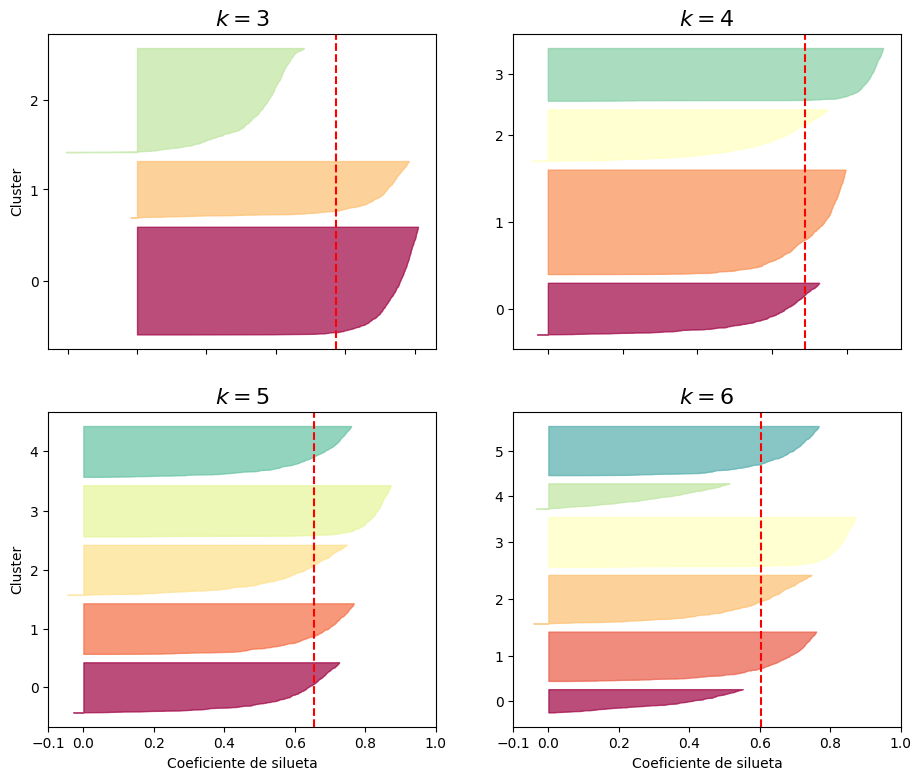

In [30]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_ #etiquetas de cada instancia de X
    silhouette_coefficients = silhouette_samples(X, y_pred) #coeficientes para cada una de las instancias en X

    padding = len(X) // 30

    pos = padding
    ticks = []
    #Grafico los coeficientes de silueta por cada cluster
    for i in range(k): #i = 0,1,2..
        coeffs = silhouette_coefficients[y_pred == i] #coeficientes correspondientes a un cluster específico
        coeffs.sort()

        color = mpl.cm.Spectral(i / k) #colormap
        plt.fill_betweenx(y = np.arange(pos, pos + len(coeffs)), x1=0, x2=coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente de silueta")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Cada diagrama tiene forma de navaja o cuchilla por cluster. La altura del diagrama indica el número de instancias que contiene el agrupamiento y su ancho representa los coeficientes de silueta de todas las instancias ordenados, más ancho es mejor porque los coeficientes de silueta se aproximan a 1. La línea de puntos indica la media de los coeficientes de silueta para el modelo.

Se puede ver que para k=3 y k=6 se obtienen agrupamientos "malos" porque tienen coeficientes de silueta bajos y se detienen antes del valor de la media (esto implica que sus instancias están demasiado cerca de otros clústeres). Para k=4 y k=5 los agrupamientos se extienden después de la línea de puntos y aunque para k=4 los coeficientes de silueta en el primer cluster son mayores, con k=5 obtenemos agrupamientos de tamaños similares.